In [19]:
from random import (uniform, shuffle)
from numpy import polyfit
import real
import warnings
import numpy as np


degree = 4 # degree 4 polynomial
t = 10     # number of features in each template
r = 40     # number of chaff points

def get_coefficients(word):
    # encodes a secret word as coefficients of a polynomial of 
    # the given degree and returns the coefficients.
    word = word.upper()
    n = int(len(word) / degree)
    if n < 1: n = 1
    print(len(word))
    substrings = [word[i:i + n] for i in range(0, len(word),n)] 
    print('substring')
    print(substrings)
    coeffs = []
    for substr in substrings:
        num = 0
        for x, char in enumerate(substr):
            num += ord(char) * 100**x
            print(num)
        coeffs.append(num**(1/3.0))
        print('coeff')
        print(coeffs)
    return coeffs

def p_x(x, coeffs):
    # returns p(x) at the given x, where p(x) is a polynomial function defined 
    # by its coefficients.
    y = 0
    degree = len(coeffs) - 1
     
    for coeff in coeffs:
        y += (x**degree * coeff)
        print(y)
        degree -= 1
    return y

def lock(secret, template):
    # given a secret to encode and a biometric template, create and return
    # a fuzzy vault in which this data is encrypted
    vault = []
    coeffs = get_coefficients(secret)
    print("coeff")
    print(coeffs)
    # calculate genuine points
    for point in template:
        vault.append([point, p_x(point, coeffs)])
        
    #add chaff points
    max_x = max(template)
    max_y = max([y for [x, y] in vault])
    for i in range(t, r):
       x_i = uniform(0, max_x * 1.1)
       y_i = uniform(0, max_y * 1.1)
       vault.append([x_i, y_i])
       shuffle(vault)

    return vault

def approx_equal(a, b, epsilon):
    return abs(a - b) < epsilon

def unlock(template, vault):
    # given a biometric template and a fuzzy fault, return the coefficients
    # used to encode the secret or None if the template is not a match
    def project(x):
        for point in vault:
            if (approx_equal(x, point[0], 0.001)):
                print(x,point[1])
                return [x, point[1]]
        return None

    Q = list(zip(*[project(point) for point in template if project(point) != None]))
    with warnings.catch_warnings():
               warnings.simplefilter('ignore', np.RankWarning)
    try:
        return polyfit(Q[0], Q[1], deg=degree)
    except IndexError:
        return None
def decode(coeffs):
    # given a set of coefficients, decode the secret word.
    # decode(get_coefficients(word)) == word
    print('coeff of authentication')
    print(coeffs)
    s = ""
    num=0
    print(len(coeffs))
    for c in coeffs:
        num=0
        print('cof')
        print(c)
        num = (round(c**3))
        print('num')
        print(num)
        while num > 0:
            s =s+ str(chr(num % 100)).lower()
            print(s)
            num = int(num/100)
            print(num)
           
    return s

vaults=[]

#print('vaults=[')
for p in real.people: 
  vaults.append((lock(p, real.people[p])))
print("vaults")
print((vaults))

13
substring
['JAY', 'ME ', 'WOO', 'GER', 'D']
74
6574
896574
coeff
[96.42627280430925]
77
6977
326977
coeff
[96.42627280430925, 68.89257245112282]
87
7987
797987
coeff
[96.42627280430925, 68.89257245112282, 92.75384862082417]
71
6971
826971
coeff
[96.42627280430925, 68.89257245112282, 92.75384862082417, 93.86350341449659]
68
coeff
[96.42627280430925, 68.89257245112282, 92.75384862082417, 93.86350341449659, 4.081655101917348]
coeff
[96.42627280430925, 68.89257245112282, 92.75384862082417, 93.86350341449659, 4.081655101917348]
0.22588432962046268
0.9594524410800184
5.4487387143279085
26.09870946551716
30.18036456743451
220.70685686327994
348.9067714826835
489.23406906112837
604.6861782609592
608.7678333628766
2900.9680326903376
3785.9472538924742
4294.6987744391445
4514.527099435895
4518.608754537812
1.1435394187035925
3.619331794879593
13.720225909687347
44.69518203647122
48.77683713838857
250.84778121645095
391.9661554515993
541.5688378921266
660.7754872285373
664.8571423304546
1.2885

In [20]:
#Authenticate

known = ['jayme woogerd', 'norman ramsey', 'ming chow']
with open('/content/ming2', 'r') as f:
     template = f.readlines()
    
temp = [float(t.split('\n')[0]) for t in template]
print( 'Input template')
print(temp)
for v in vaults:
     print('vaults')
     print(v)
     coeffs1 = unlock(temp, v)
     print('coeff')
     print(coeffs1)
     try:
        name = decode(coeffs1)
        print(name)
        if name in known:
            print('Hello, %s!' % name.title())
     except TypeError:
            pass
print("Unknown user")



Input template
[0.31, 1.32, 2.442, 0.493, 1.43, 0.35, 2.52, 3.559, 1.233, 0.001]
vaults
[[0.16664179322292608, 4141.74193817882], [4.060472357680675, 4832.105656357118], [1.23, 608.7678333628766], [3.1012188232908824, 2958.5938924102365], [0.33, 48.77683713838857], [0.06386482517697087, 19211.031195629224], [3.1682544370812935, 4428.169823677215], [1.254, 641.9385996028429], [2.038142340186551, 12968.339732739618], [3.668586830289406, 4159.220363860542], [2.101252887466489, 8390.317289275845], [0.133001929835046, 14934.730623830954], [1.3983655980883114, 9596.906787450474], [0.880435417552287, 17783.28432357695], [3.1176766325994447, 26657.722066126928], [3.7356577126017263, 22388.818835098977], [0.38133452757674713, 19481.623312647844], [0.8725754647527184, 1652.400782202779], [3.68351744316955, 24957.32113555233], [2.89852677316189, 19252.339874386074], [1.9245382560974988, 28820.830977594283], [2.342, 4518.608754537812], [1.4127868986577503, 16094.366788025425], [3.5250100388495924,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


In [21]:
coeffs=[96.42627280430925, 68.89257245112282, 92.75384862082417, 93.86350341449659, 4.081655101917348]
point=[0.23 ,1.13,2.322,3.98,0.333,1.269,0.34,2.32,1.254,0.03]
p_x(point[0], coeffs)

0.2698402460783071
1.1080561750911184
6.014734767132717
27.603340552466932
31.68499565438428


31.68499565438428

In [25]:
[[0.32, 13.59331080002034], [1.32, 167.16702974559988], [2.452, 1154.99589370935], [0.49, 22.144849477892148], [1.43, 209.42013148923533], [0.34, 14.424183602701667], [2.52, 1268.4266489912109], [3.55, 4268.092331197526], [1.233, 138.92101556873203], [0.001, 4.451043162396436]]
[19.466741466737872, 19.290100250098828, 18.88200184653206, 19.976639391388517, 4.431047621693634]
[ 28.27266806 -35.04000968 113.63279429 -39.97695105  13.85038019]

SyntaxError: ignored

# New Section

# New Section

X points are: 
 [ 0  3  6  9 12 15 18 21 24 27]
Y points are: 
 [  0   9  36  81 144 225 324 441 576 729]
[ 1.00000000e+00 -2.35707562e-14  1.85540356e-13]
Coeeficient values:
 [ 1.00000000e+00 -2.35707562e-14  1.85540356e-13]

Given x_test value is:  15

Predicted value of y_pred for given x_test is:  225.0


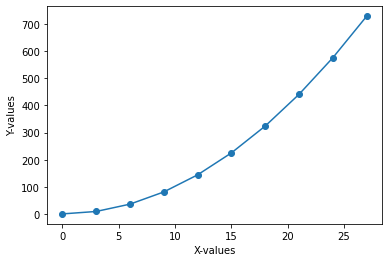

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 30, 3)
print("X points are: \n", x)
y = x**2
print("Y points are: \n", y)
plt.scatter(x, y)
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.plot(x, y)
p = np.polyfit(x, y, 2)  # Last argument is degree of polynomial
print(p)
print("Coeeficient values:\n", p)

predict = np.poly1d(p)
x_test = 15
print("\nGiven x_test value is: ", x_test)
y_pred = predict(x_test)
print("\nPredicted value of y_pred for given x_test is: ", y_pred)

In [24]:
[[0.22, 30.18036456743451], [1.23, 608.7678333628766], [2.342, 4518.608754537812], [0.33, 48.77683713838857], [1.27, 664.8571423304546], [0.34, 50.7139238279746], [2.32, 4374.847702030894], [3.98, 30385.348125796954], [1.254, 641.9385996028429], [0.03, 6.982976872848139], [3.8529565712279013, 24564.387473446597], [1.4166841077317456, 23731.32354343181], [0.0404686039217992, 13967.362012009333], [0.7717234124646324, 22281.241917474556], [3.263606416228908, 24229.89860310903], [0.311582443912789, 7160.631978523994], [3.2413410203922157, 3145.0934316217513], [2.1149821180226067, 14513.996820525814], [1.5945316048080065, 636.0806927551871], [3.497623210544516, 32237.379967398047], [0.603730904613979, 16660.978481881342], [0.12758585673103415, 8486.035902285386], [4.181758803465524, 22085.89277274569], [0.7790777017361026, 927.85949310619], [3.0962387827763576, 30387.40887633434], [4.222023583176528, 5224.772433744082], [4.028212822240626, 12403.735308965279], [4.321243367505221, 21281.85565438101], [0.8237826107500189, 24605.523602070527], [1.3935932287309556, 8899.974052715843], [1.0016029678591707, 1400.7849770281107], [0.21992505894656397, 7841.737658712866], [2.323702405065307, 3197.718261027161], [2.1901740309528206, 5212.773426287344], [2.5373883514692737, 27086.866421702856], [0.7137053916461421, 1495.043866187526], [2.0406936238374906, 10251.368602058425], [0.6514163669904226, 7427.504383088144], [0.12088117547403997, 18694.27912107115], [1.8412401803538405, 24306.075218886523]]
9

9